

# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've selected the TMDB data set to analyze. The dataset includes 10,000 movies with data relating to budget, revenue, popularity, genre, cast and directors. 

From this data I hope to answer the following questions:
1. Have movies gotten longer or shorter over the years?
2. Have movie budgets increased over the years?
3. Have profits increased?
4. What is the most common genre?
5. What are the most profitable movies? 
6. Which months are associated with higher profits?
7. Are there any very strong correlations in the data? 

In [81]:
#import the modules. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#converting scientific notation to float.
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [82]:
#Loading data crom csv
movies = pd.read_csv(r'tmdb-movies.csv')

In [83]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [84]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [85]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## Observations about the data
A few things are noticible when inspecting this dataset. I'll need to clean the data in the following ways:

1. Some values are NaN, I'll remove those
2. Drop rows I wont be using. These include imdb_id, budget, revenue, homepage, tagline, and overview. 
3. I'll want to add a new column for profit and caculate it using budget_adj and revenue_adj
4. Check for any duplicate rows and remove them. 
5. Some of the values are equal to zero. I'll want to replace those with NaN

# Cleaning the Data

First I want to remove the columns I wont be using

In [86]:
movies.drop(['imdb_id', 'budget', 'revenue', 'homepage','tagline', 'overview'],axis=1,inplace=True)

In [87]:
movies.head(1)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52


Now I'll replace any fields with a value of 0 with NaN

In [88]:
#Function that takes in a dataframe and string for column. 
def zero_to_nan(df, column):
    df[column]=df[column].replace(0, np.nan)

zero_to_nan(movies, 'popularity')
zero_to_nan(movies, 'runtime')
zero_to_nan(movies, 'budget_adj')
zero_to_nan(movies, 'revenue_adj')


Now I'll drop all the rows that contain NaN values

In [89]:
movies = movies.dropna()

Now I'll check the dataframe and verify that no values of 0 still exist. 

In [90]:
movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3678.00,3678.00,3678.00,3678.00,3678.00,3678.00,3678.00,3678.00
mean,39225.33,1.23,109.56,547.58,6.18,2001.09,45383751.03,142050393.02
std,67240.51,1.50,19.85,894.86,0.79,11.38,45186519.71,219498278.12
min,5.00,0.01,26.00,10.00,2.20,1960.00,0.97,2.86
25%,5478.25,0.48,96.00,78.00,5.70,1995.00,13816365.76,20385588.61
50%,11019.50,0.83,106.00,218.50,6.20,2004.00,31050611.23,65485797.86
75%,38027.00,1.41,119.75,595.50,6.70,2010.00,62145541.52,170438150.78
max,417859.00,32.99,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


In [91]:
print len(movies)

3678


Removing the rows left 3678 out of the initial 10866. There was quite a lot of missing data in the dataset. 

Now I'm going to convert budget_adj and revenue_adj to integers and release_date to a datetime format. 

In [92]:
movies['budget_adj']=movies.budget_adj.astype('int64')
movies['revenue_adj']=movies.revenue_adj.astype('int64')
movies['release_date'] = pd.to_datetime(movies['release_date'])

I want to add a profit column to the data. I'll take revenue_adj and subtract budget_adj from it to get this value

In [93]:
movies['profit'] = movies['revenue_adj'] - movies['budget_adj']

In [94]:
movies.head(1)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1254445953


I'll create another column containing the month each movie was released

In [95]:
movies['release_month'] = movies['release_date'].dt.month

In [96]:
movies.head(1)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1254445953,6


# Exploratory Data Analysis

## Have movies gotten longer or shorter over the years?

<function matplotlib.pyplot.show>

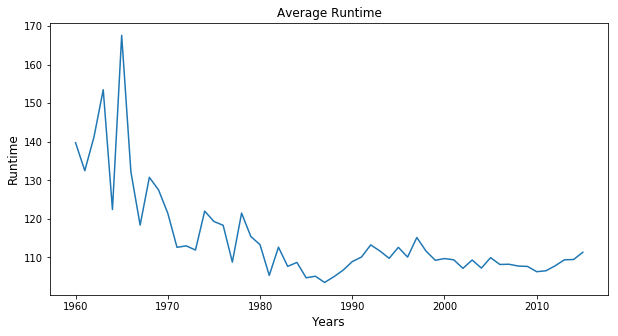

In [97]:
runtime = movies.groupby('release_year')['runtime'].mean()

plt.figure(figsize=(10,5))
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Runtime', fontsize = 12)
plt.title('Average Runtime')
plt.plot(runtime)
plt.show

Around the mid 1960s, there was a sharp decline in the average movie runtime. It continued to decline until the mid to late 1980s where it leveled off and stayed between 110 and 120 mintues on average. 

## Have movie budgets increased over time?

<function matplotlib.pyplot.show>

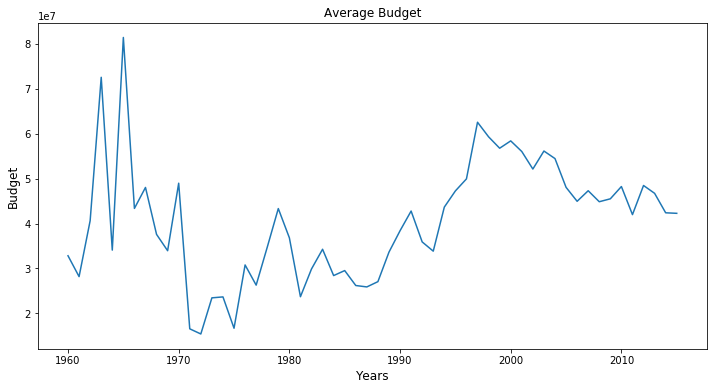

In [98]:
budget = movies.groupby('release_year')['budget_adj'].mean()

plt.figure(figsize=(12,6))
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Budget', fontsize = 12)
plt.title('Average Budget')
plt.plot(budget)
plt.show

Recovering from a drop in the early 1970s, movie budgets have been on the rise. Lately there has been a slight downward trend starting around the year 2000 and continuing today. 

## Have movies gotten more or less profitable?

<function matplotlib.pyplot.show>

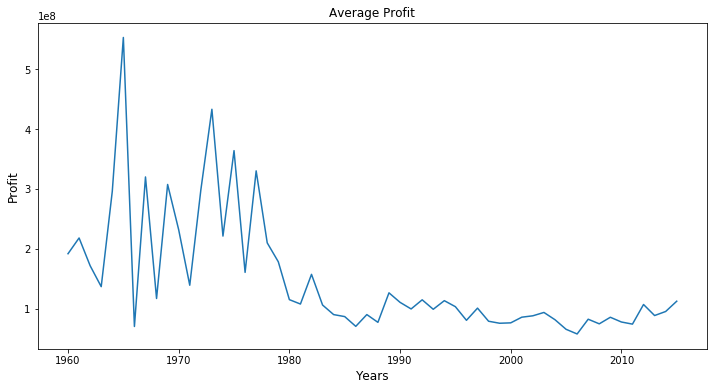

In [99]:
profit = movies.groupby('release_year')['profit'].mean()

plt.figure(figsize=(12,6))
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Profit', fontsize = 12)
plt.title('Average Profit')
plt.plot(profit)
plt.show

Average movie profits fluctuated from 1960 to 1980. After 1980 they seem to level off. This is near the time we started seeing increases in average movie budgets. 

## What are the most profitable movies? 

In [100]:
most_profit = movies.sort_values(['profit'], ascending=False)
most_profit = most_profit.head(10)

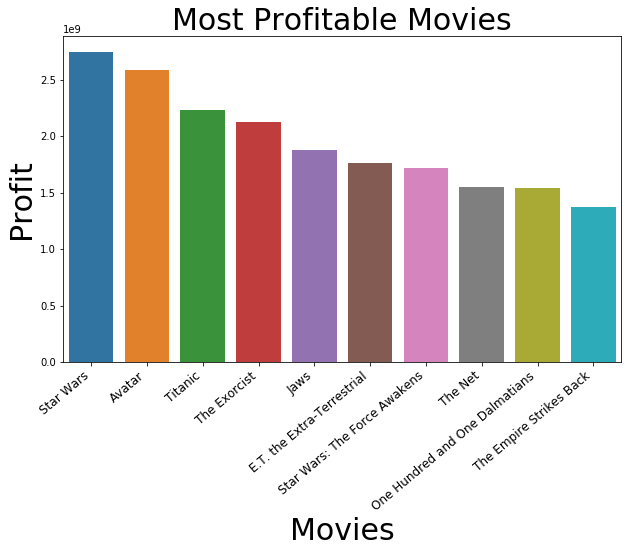

In [101]:
#Graph the top 10 movies
plt.figure(figsize= (10,6))
ax=sns.barplot(x = 'original_title', y = 'profit', data=most_profit)

#rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize = 12)

#Name axis' and title
plt.xlabel('Movies', fontsize = 30)
plt.ylabel('Profit', fontsize = 30)
plt.title('Most Profitable Movies', fontsize = 30)
plt.show()

Here are the top ten most profitable movies. Interestingly, three of these are Star Wars movies. I am glad to see that The Exorcist, my favorite movie, beat out The Force Awakens in adjusted profits. 

## What is the most common genre?

In [102]:
#Creates a long string with each value from the genre column added to it. 
genres = movies['genres'].str.cat(sep = "|")
#Creates a dataframe for the split up genres
genres = pd.DataFrame(genres.split("|"), columns=['genre'])

Text(0.5,1,u'Number of movies in each genre')

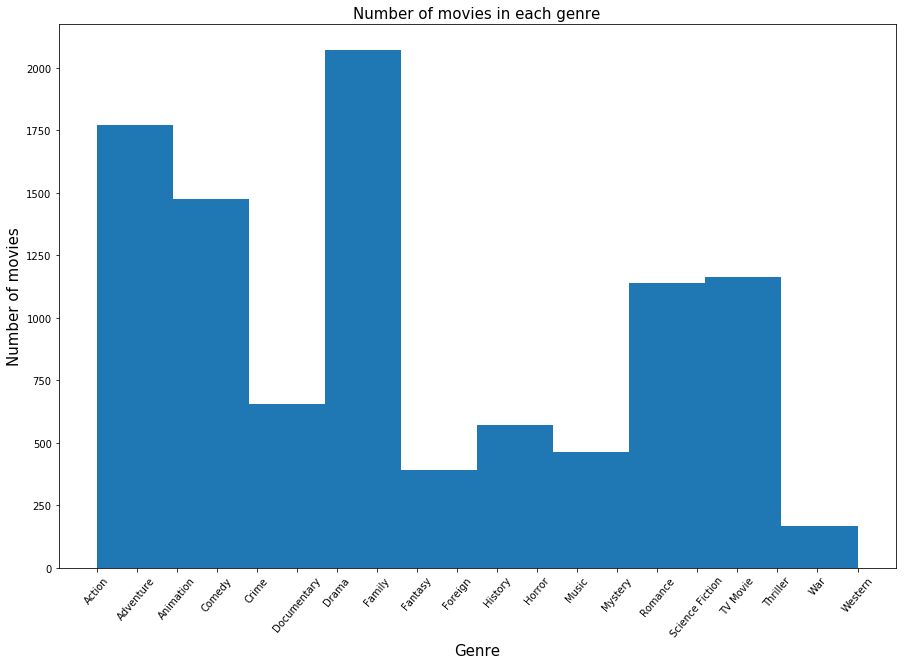

In [103]:
plt.figure(figsize=(15,10))
plt.hist(genres)
plt.ylabel("Number of movies", fontsize=15)
plt.xlabel("Genre", fontsize = 15)
plt.xticks(rotation=50)
plt.title("Number of movies in each genre", fontsize = 15)

Drama is the most common movie produced with Action coming in second

## Which months are the most profitable? 

In [104]:
months = movies.groupby('release_month')['profit'].sum()

Text(0,0.5,u'Movie Profits')

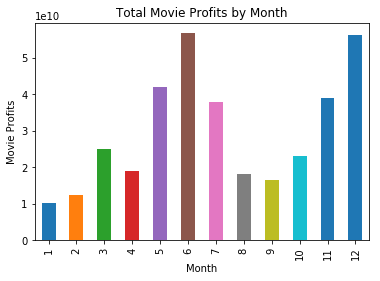

In [105]:
months.plot(kind='bar', title="Total Movie Profits by Month")
plt.xlabel("Month")
plt.ylabel("Movie Profits")

It looks like June and December are the two most profitable months for movies. They are very close to one another. 

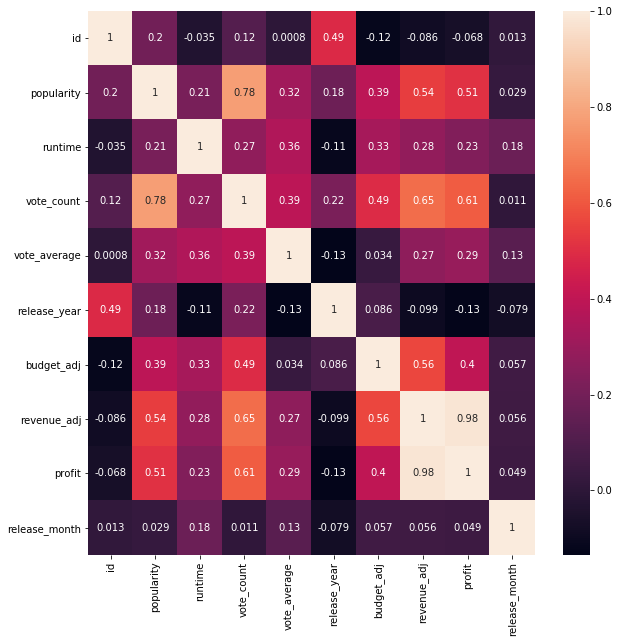

In [106]:
matrix = movies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True)
plt.show()

Looking at the correlation matrix, I want to look deeper at the correlation of vote_count and revenue_adj. This is the strongest correlation in the matrix aside from values that can be direcly linked to one another such as vote count and popularity and profit and revenue. 

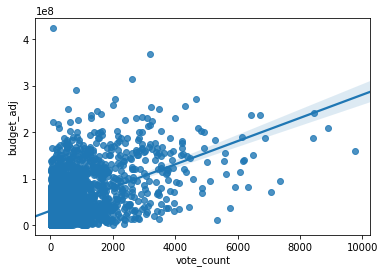

In [107]:
sns.regplot(x=movies['vote_count'], y=movies['budget_adj'])

There are a lot of datapoints and it's hard to make out whats going on but it seems like there is an upwards trend. With most of the datapoints residing at the lower end of the scale, it's hard to get a good visualiztion on the data. 

# Conclusion

While I had hoped to find a much stronger correlation between some of the variables in the data, I did learn some interesting things. I suspect the increase in budgets is related to the decrease in profits. Larger budget movies are going to need to sell a lot more just to break even. Movies have also gotten a lot shorter on average. Is this because more movies are able to be released per year? I think there would be even more interesting things to find with a more complete dataset. Having to trim down about 7000 rows puts a limitation on predictions. 

## Limitations

- Since most of the rows were missing values and needed to be removed, this limited the data set to about 3800 values. With more data, more acurate predictions could be created
- There is no indication of currency for the budget_adj and revenue_adj. Currency value could change the outcome of some of the plots in relation to most profitable and budget. 